# TP2  Exercice : récap. (TP à rendre sur Moodle).
## Exercice  1 
Ecrire le code qui permet de trouver le modèle (les meilleures valeurs de w et b) pour les données du dataset houses.
Reprendre toutes les étages de l'algrithme (voir ci dessous).

On le fait pour les deux cas suivants :

- Cas 1- On reste sur une variable par exemple prédire le prix de la maison en fonction de sa supérficie.
- Cas 2- Prédire le prix en fonction de tous les critères.

Pour chacun des cas : 
- Utiliser uniquement les 70 premières lignes du dataset pour l'entrainement 
- Identifier les meilleures valeurs des paramètres du modèle.
- Tracer la courbe de la fonction coût en fonction des itérations.
- Calculer les prédictions sur les données restantes (30 dernières)  
- Tracer les courbes permenttant de visualiser les valeurs prédites versus les bonnes valeurs sur les données de test?


Votre code doit suivre les étapes suivantes :
- 1. Le dataset : chargement et visualisation des données
- 2. Définition du modèle 
- 3. Calcul de la fonction coût
- 4. Calcul des gradients
- 5. Modification des paramètres (apprentissage).
- 6. Visualiser les tracés utiles permmetant de vérifier si le modèle a bien appris (y_test versus y_prédit, y_train versus y_prédit, ....)
    
    

## Exercice 2 : régression polynomiale

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from lab_utils_multi import zscore_normalize_features

#dataset data\houses.txt
dataset = pd.read_csv('data/houses.txt', sep = ',', header = None) #['superficie','nb chambre','étage','age',prix# ]
dataset_header = ['superficie','nb chambre','étage','age','prix']
x_train_cas1 = dataset.iloc[:70, 0].values.reshape(-1,1) #obligé sinon peux pas utiliser gradient descent (transformation en matrice)
y_train_cas1 = dataset.iloc[:70, -1].values
print(x_train_cas1.shape) #vecteur
x_train_cas1 = zscore_normalize_features(x_train_cas1) # normalisation des données (permet de baisser l'échelle des données)


(70, 1)


In [3]:
#fonction cout
from lab_utils_multi import compute_cost
"""
def compute_cost(X, y, w, b):
compute cost
Args:
X : (ndarray): Shape (m,n) matrix of examples with multiple features
w : (ndarray): Shape (n)   parameters for prediction
    b : (scalar):              parameter  for prediction
Returns
cost: (scalar)             cost
m = X.shape[0]
cost = 0.0
for i in range(m):
    f_wb_i = np.dot(X[i],w) + b
    cost = cost + (f_wb_i - y[i])**2
cost = cost/(2*m)
return(np.squeeze(cost))
"""

"""
Mesure la distance entre nos prédictions et les vraies valeurs

les entrées
X : Matrice des variables (par exemple, la taille de la maison). Type : array_like (m,n)
y : Valeurs réelles (par exemple, le prix de la maison). Type : array_like (m,1)
w : Paramètres du modèle. Type : array_like (n,1)
b : Paramètre du modèle. Type : scalaire
"""

'\nMesure la distance entre nos prédictions et les vraies valeurs\n\nles entrées\nX : Matrice des variables (par exemple, la taille de la maison). Type : array_like (m,n)\ny : Valeurs réelles (par exemple, le prix de la maison). Type : array_like (m,1)\nw : Paramètres du modèle. Type : array_like (n,1)\nb : Paramètre du modèle. Type : scalaire\n'

In [4]:
#calcul du cout initial
w = 0
b = 0
cout_init_x1 = compute_cost(x_train_cas1, y_train_cas1, w, b)
print(cout_init_x1)
#cout initial = 74168.63259634287

74168.63259634287


In [5]:
#optimisation des paramètres
from lab_utils_multi import compute_gradient
""" def compute_gradient(X, y, w, b):
Computes the gradient for linear regression
    Args:
X : (ndarray Shape (m,n)) matrix of examples
y : (ndarray Shape (m,))  target value of each example
w : (ndarray Shape (n,))  parameters of the model
b : (scalar)              parameter of the model
Returns
dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.
dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
m,n = X.shape           #(number of examples, number of features)
dj_dw = np.zeros((n,))
dj_db = 0.

for i in range(m):
    err = (np.dot(X[i], w) + b) - y[i]
    for j in range(n):
        dj_dw[j] = dj_dw[j] + err * X[i,j]
    dj_db = dj_db + err
dj_dw = dj_dw/m
dj_db = dj_db/m

return dj_db,dj_dw
##############################################  """

' def compute_gradient(X, y, w, b):\nComputes the gradient for linear regression\n    Args:\nX : (ndarray Shape (m,n)) matrix of examples\ny : (ndarray Shape (m,))  target value of each example\nw : (ndarray Shape (n,))  parameters of the model\nb : (scalar)              parameter of the model\nReturns\ndj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.\ndj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.\nm,n = X.shape           #(number of examples, number of features)\ndj_dw = np.zeros((n,))\ndj_db = 0.\n\nfor i in range(m):\n    err = (np.dot(X[i], w) + b) - y[i]\n    for j in range(n):\n        dj_dw[j] = dj_dw[j] + err * X[i,j]\n    dj_db = dj_db + err\ndj_dw = dj_dw/m\ndj_db = dj_db/m\n\nreturn dj_db,dj_dw\n##############################################  '

In [6]:
#calcul du gradient initial

"""pour rappel compute_gradient est égal a 1/m*somme((f_wb_i - y_i)*x_i)
f_wb_i = modèle = w*x_i + b
y_i = valeur réelle
x_i = valeur de la variable x[i]
"""
result = compute_gradient(x_train_cas1, y_train_cas1, w, b)
print(result)

(array([-368.1436]), array([-97.80998046]))


In [7]:
from lab_utils_multi import gradient_descent
#import de la fonction gradient_descent
""""def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

Performs batch gradient descent to learn theta. Updates theta by taking
num_iters gradient steps with learning rate alpha

Args:
X : (array_like Shape (m,n)    matrix of examples
y : (array_like Shape (m,))    target value of each example
w_in : (array_like Shape (n,)) Initial values of parameters of the model
b_in : (scalar)                Initial value of parameter of the model
cost_function: function to compute cost
gradient_function: function to compute the gradient
alpha : (float) Learning rate
num_iters : (int) number of iterations to run gradient descent
Returns
w : (array_like Shape (n,)) Updated values of parameters of the model after
running gradient descent
b : (scalar)                Updated value of parameter of the model after
running gradient descent
"""

'"def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):\n\nPerforms batch gradient descent to learn theta. Updates theta by taking\nnum_iters gradient steps with learning rate alpha\n\nArgs:\nX : (array_like Shape (m,n)    matrix of examples\ny : (array_like Shape (m,))    target value of each example\nw_in : (array_like Shape (n,)) Initial values of parameters of the model\nb_in : (scalar)                Initial value of parameter of the model\ncost_function: function to compute cost\ngradient_function: function to compute the gradient\nalpha : (float) Learning rate\nnum_iters : (int) number of iterations to run gradient descent\nReturns\nw : (array_like Shape (n,)) Updated values of parameters of the model after\nrunning gradient descent\nb : (scalar)                Updated value of parameter of the model after\nrunning gradient descent\n'

In [8]:
#optimisation des paramètres
w = 200
b = 300
alpha = 1.0e-2
num_iters = 1000

w , b , cost_history = gradient_descent(x_train_cas1, y_train_cas1, w, b, compute_cost, compute_gradient, alpha, num_iters)
print(w)
print(b)

[97.81439213]
[368.14065816]


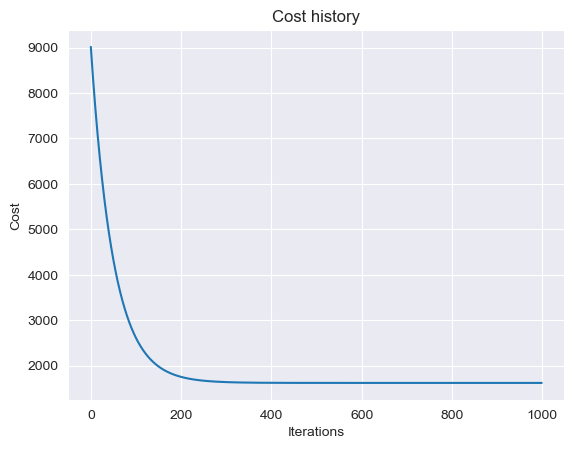

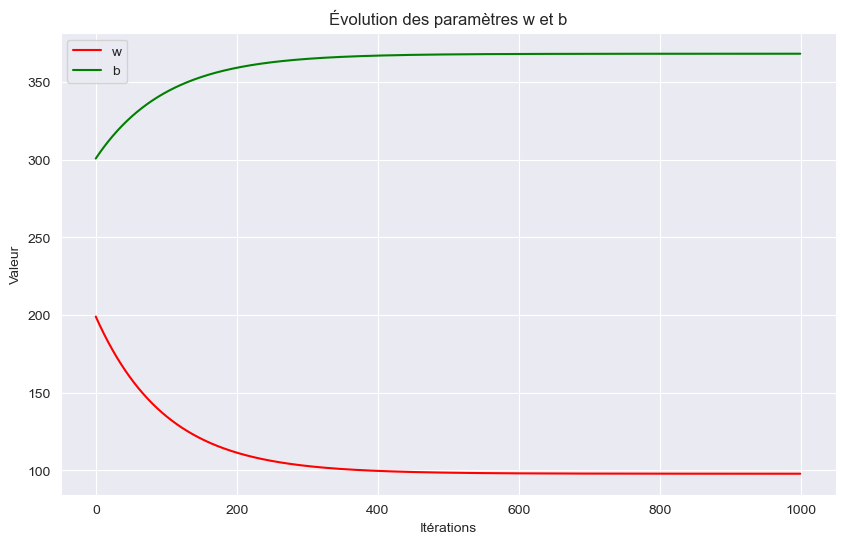

In [9]:
#dict_keys(['cost', 'params', 'grads', 'iter']) == cost_history.keys()
#param = w et b
plt.plot(cost_history['cost'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost history')
plt.show()

w_tab = [params[0] for params in cost_history['params']]
b_tab = [params[1] for params in cost_history['params']]

plt.figure(figsize=(10,6))
plt.plot(cost_history['iter'], w_tab, '-r', label='w')
plt.plot(cost_history['iter'], b_tab, '-g', label='b')
plt.xlabel('Itérations')
plt.ylabel('Valeur')
plt.title('Évolution des paramètres w et b')
plt.legend()
plt.grid(True)
plt.show()


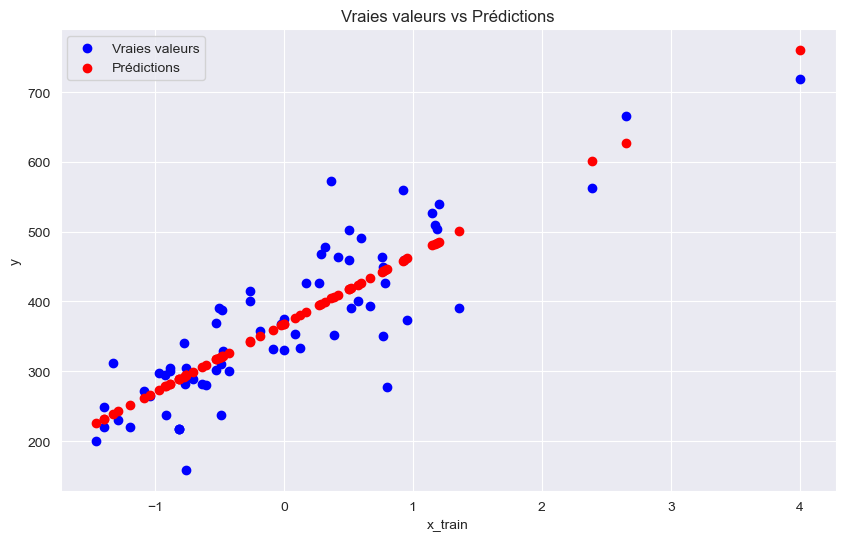

In [10]:
y_pred = w * x_train_cas1 + b
plt.figure(figsize=(10,6))
plt.scatter(x_train_cas1, y_train_cas1, color='blue', label='Vraies valeurs')
plt.scatter(x_train_cas1, y_pred, color='red', label='Prédictions')
plt.title('Vraies valeurs vs Prédictions')
plt.xlabel('x_train')
plt.ylabel('y')
plt.legend()
plt.show()

In [11]:
x_train_cas2 = dataset.iloc[:70, :-1].values
x_train_cas2 = zscore_normalize_features(x_train_cas2) # normalisation des données
y_train_cas2 = dataset.iloc[:70, -1].values
print(x_train_cas2.shape) #matrice

(70, 4)


In [12]:
from lab_utils_multi import compute_cost_matrix

#calcul du cout initial
w = np.zeros((x_train_cas2.shape[1],)) #vecteur car x_train = matrice
b = 0 # biais toujours un scalaire
cout_init_x2 = compute_cost_matrix(x_train_cas2, y_train_cas2, w, b) #fonction pour la régression linéaire matricielle optimisée

In [13]:
from lab_utils_multi import compute_gradient_matrix

#calcul du gradient initial
result = compute_gradient_matrix(x_train_cas2, y_train_cas2, w, b) #fonction pour la régression linéaire matricielle optimisée
print(result)

(-368.14359999999994, array([-97.80998046, -37.64461931, -36.06344528,  64.45335774]))


In [14]:
#optimisation des paramètres
w = np.zeros((x_train_cas2.shape[1],))
b = 0
alpha = 1.0e-2
num_iters = 1000
w , b , cost_history = gradient_descent(x_train_cas2, y_train_cas2, w, b, compute_cost, compute_gradient_matrix, alpha, num_iters)

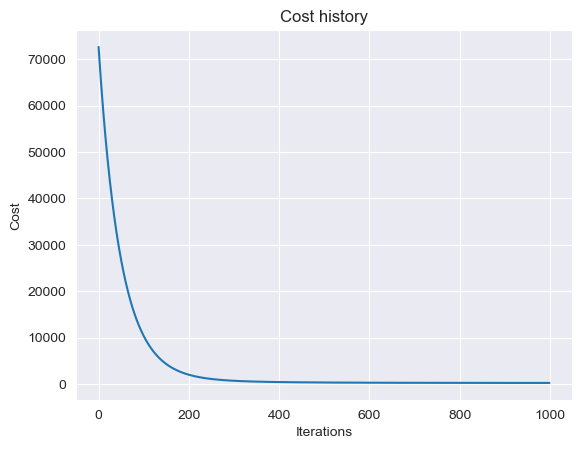

In [15]:
plt.plot(cost_history['cost'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost history')
plt.show()


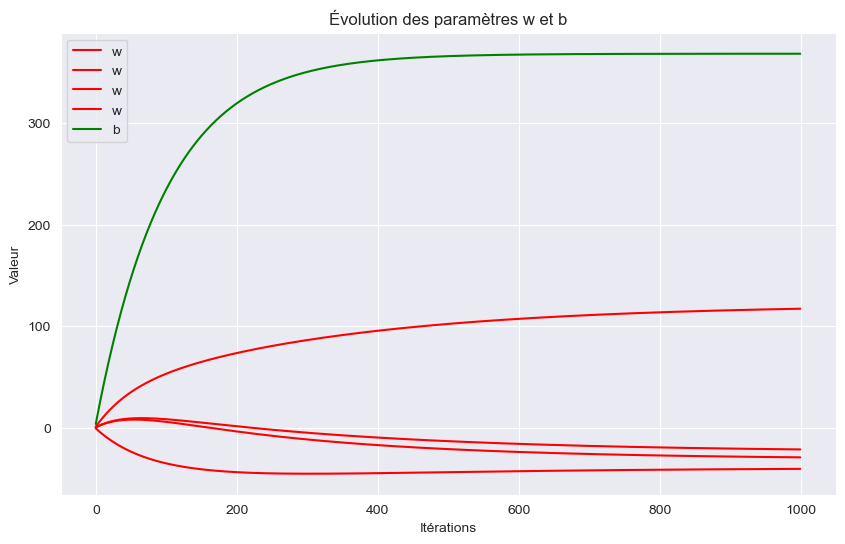

In [16]:
w_tab = [params[0] for params in cost_history['params']]
b_tab = [params[1] for params in cost_history['params']]
plt.figure(figsize=(10,6))
plt.plot(cost_history['iter'], w_tab, '-r', label='w')
plt.plot(cost_history['iter'], b_tab, '-g', label='b')
plt.xlabel('Itérations')
plt.ylabel('Valeur')
plt.title('Évolution des paramètres w et b')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
y_pred_cas2 = np.dot(x_train_cas2, w) + b # calcul matriciel des prédictions


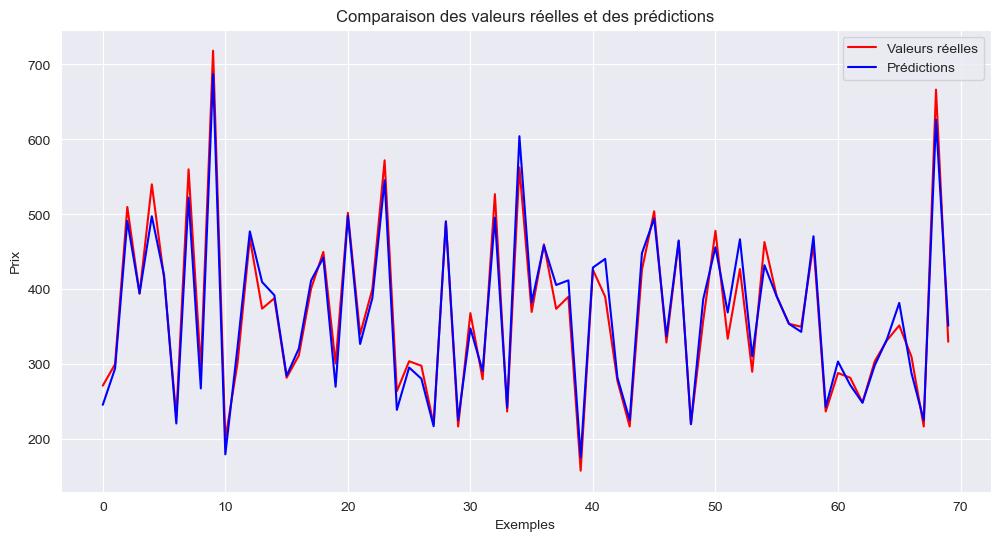

In [18]:
plt.figure(figsize=(12,6))
plt.plot(y_train_cas2, 'r', label='Valeurs réelles')
plt.plot(y_pred_cas2, 'b', label='Prédictions')
plt.xlabel('Exemples')
plt.ylabel('Prix')
plt.title('Comparaison des valeurs réelles et des prédictions') #tout les critères
plt.legend()
plt.grid(True)
plt.show()
